In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv("/content/sample_data/train_dataset.csv")
df_test = pd.read_csv("/content/sample_data/test_dataset.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [4]:
df_train.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


In [5]:
df_train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


# **Exploratory Data Analysis (EDA)**

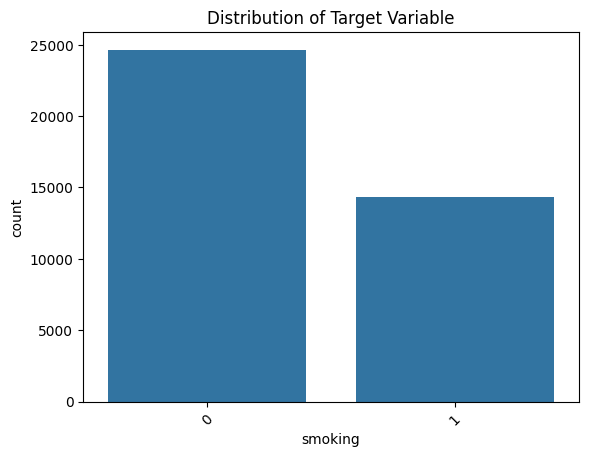

,proportion
smoking,
0,0.632721
1,0.367279


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='smoking', data=df_train)
plt.title("Distribution of Target Variable")
plt.xticks(rotation=45)
plt.show()

df_train['smoking'].value_counts(normalize=True)

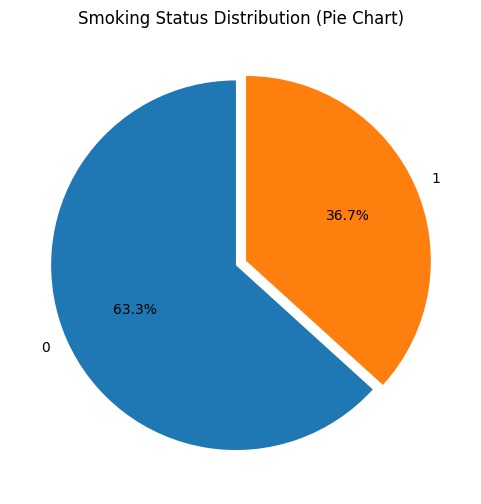

In [7]:
# Value counts
counts = df_train['smoking'].value_counts(normalize=True)

# Plot
plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.03]*len(counts),         # small separation for clarity
)
plt.title("Smoking Status Distribution (Pie Chart)")
plt.show()

*Clear imbalance in data class a has 63.33% and class b has 37% ie appx 2:1 ratio hence we ll apply smote*

**Univariate Analysis**

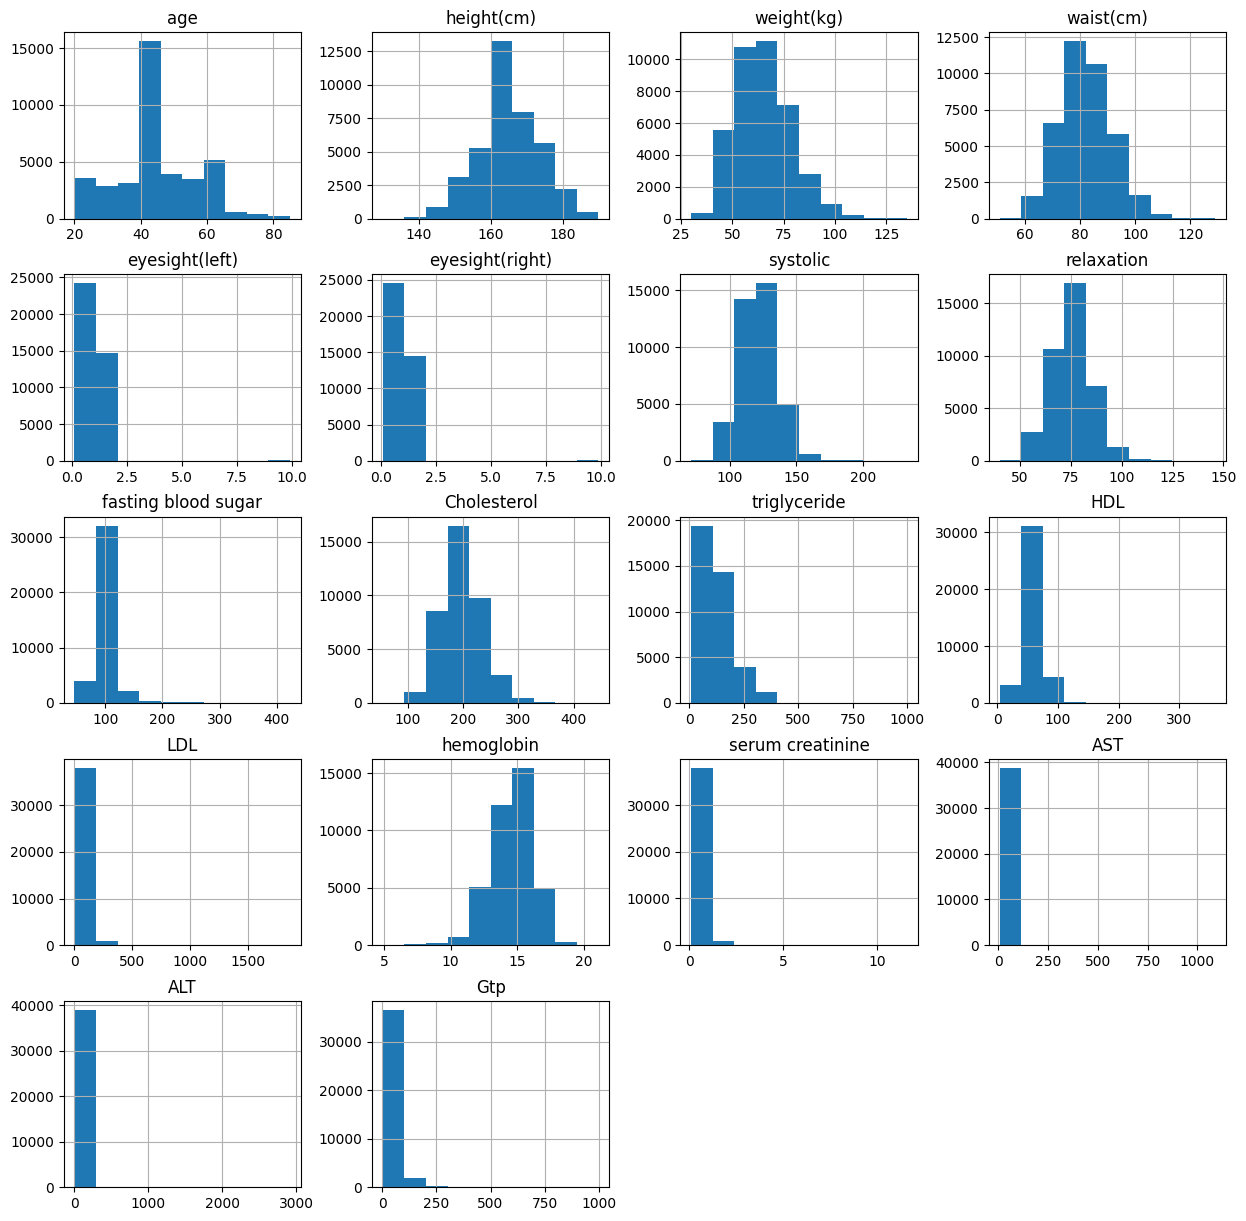

In [8]:
numerical_cols = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST',
       'ALT', 'Gtp']
df_train[numerical_cols].hist(figsize=(15, 15))
plt.show()

Most features (height, weight, BP, hemoglobin, waist) are well-behaved and roughly normal.

Some features (eyesight, cholesterol, triglycerides, LDL/HDL, creatinine, liver enzymes) are highly right-skewed with outliers.

A few features (age, fasting blood sugar) show irregular or clustered patterns, suggesting cohort effects or categorical-like behavior.

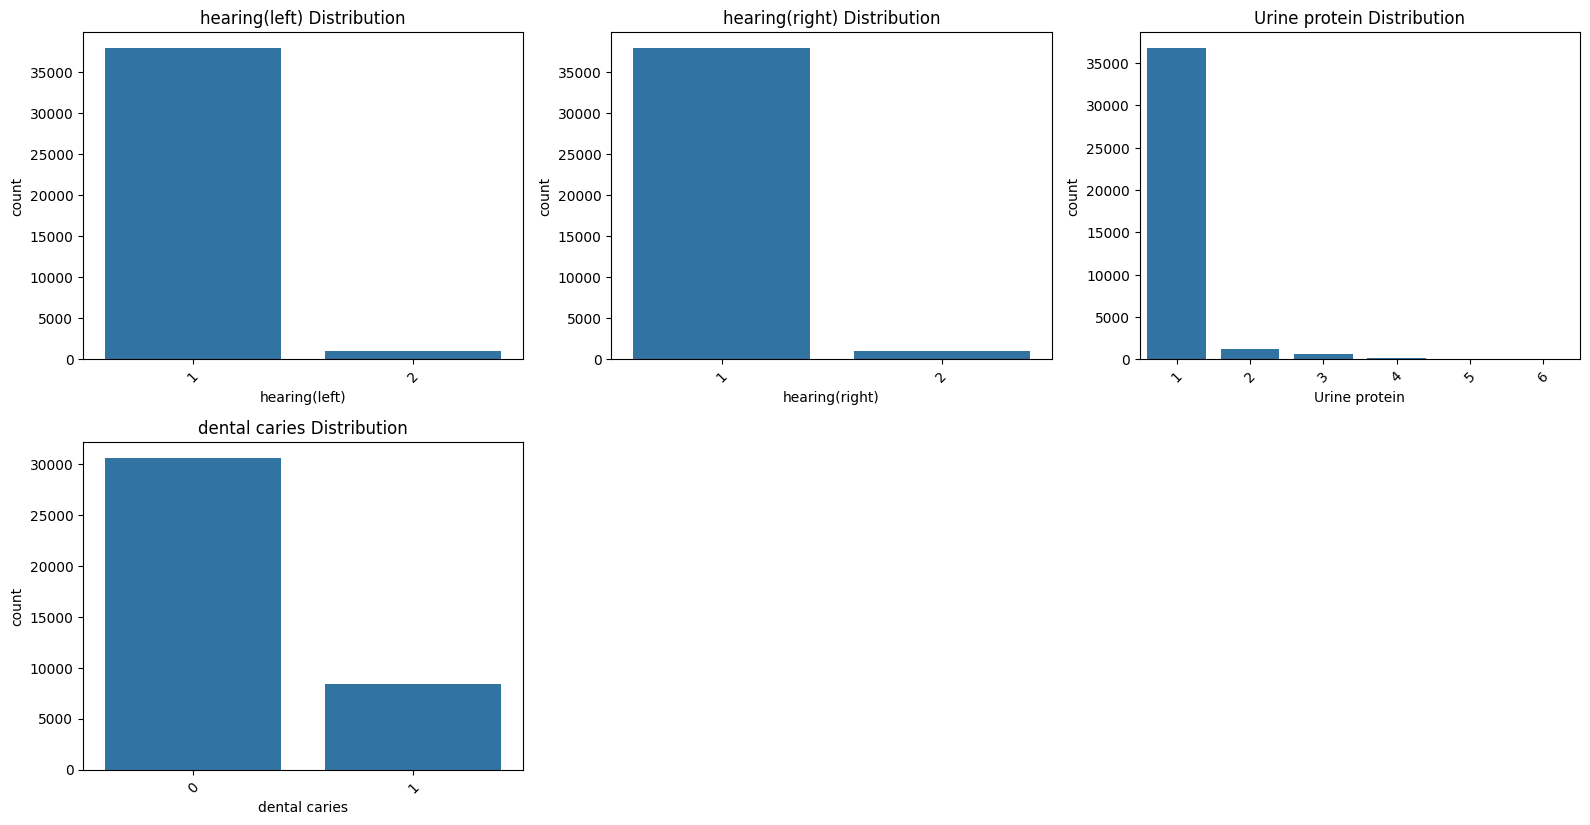

In [9]:

categorical_cols = ['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries']
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df_train)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


Most features show normal or mildly skewed distributions (e.g., height, weight, blood pressure).
Several health indicators are highly right-skewed with strong outliers (lipids, liver enzymes, eyesight, creatinine).
A few features show irregular patterns like bimodality or heavy clustering (age, fasting blood sugar).

In [10]:
print(df_train.duplicated().sum())

5517


In [11]:
df_train = df_train.drop_duplicates()

In [12]:
print(df_train.duplicated().sum())

0


In [13]:
df_train.isna().sum()


,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0
relaxation,0


In [14]:
df_train.isna().sum().sum()


np.int64(0)

Removed all duplicates and there are no missing values

In [15]:
df_train.isna().sum()[df_train.isna().sum() > 0]


,0


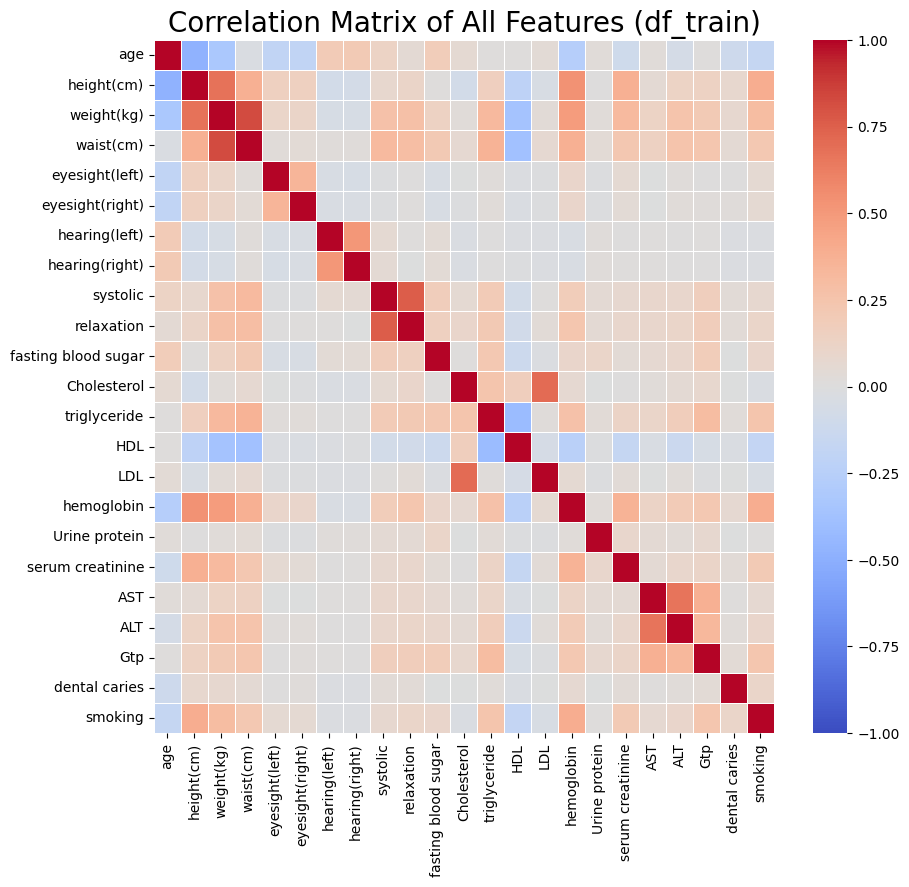

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate the correlation matrix

corr_matrix = df_train.corr()

# 2. Set up the figure size
plt.figure(figsize=(10, 9))

# 3. Create the heatmap
# annot=False is used here to prevent clutter since there are many features.
# 'vmax' and 'vmin' set the color bar range from -1 to 1.
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)

plt.title('Correlation Matrix of All Features (df_train)', fontsize=20)
plt.show()

Outlier Detection

In [17]:
print("--- Outlier Detection using IQR ---")
for col in numerical_cols:
    q1 = df_train[col].quantile(0.25)
    q3 = df_train[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]
    print(f"Column '{col}': {len(outliers)} outliers detected.")

--- Outlier Detection using IQR ---
Column 'age': 184 outliers detected.
Column 'height(cm)': 155 outliers detected.
Column 'weight(kg)': 127 outliers detected.
Column 'waist(cm)': 329 outliers detected.
Column 'eyesight(left)': 810 outliers detected.
Column 'eyesight(right)': 823 outliers detected.
Column 'systolic': 414 outliers detected.
Column 'relaxation': 427 outliers detected.
Column 'fasting blood sugar': 1987 outliers detected.
Column 'Cholesterol': 373 outliers detected.
Column 'triglyceride': 1412 outliers detected.
Column 'HDL': 595 outliers detected.
Column 'LDL': 403 outliers detected.
Column 'hemoglobin': 476 outliers detected.
Column 'serum creatinine': 1905 outliers detected.
Column 'AST': 1800 outliers detected.
Column 'ALT': 2255 outliers detected.
Column 'Gtp': 2901 outliers detected.


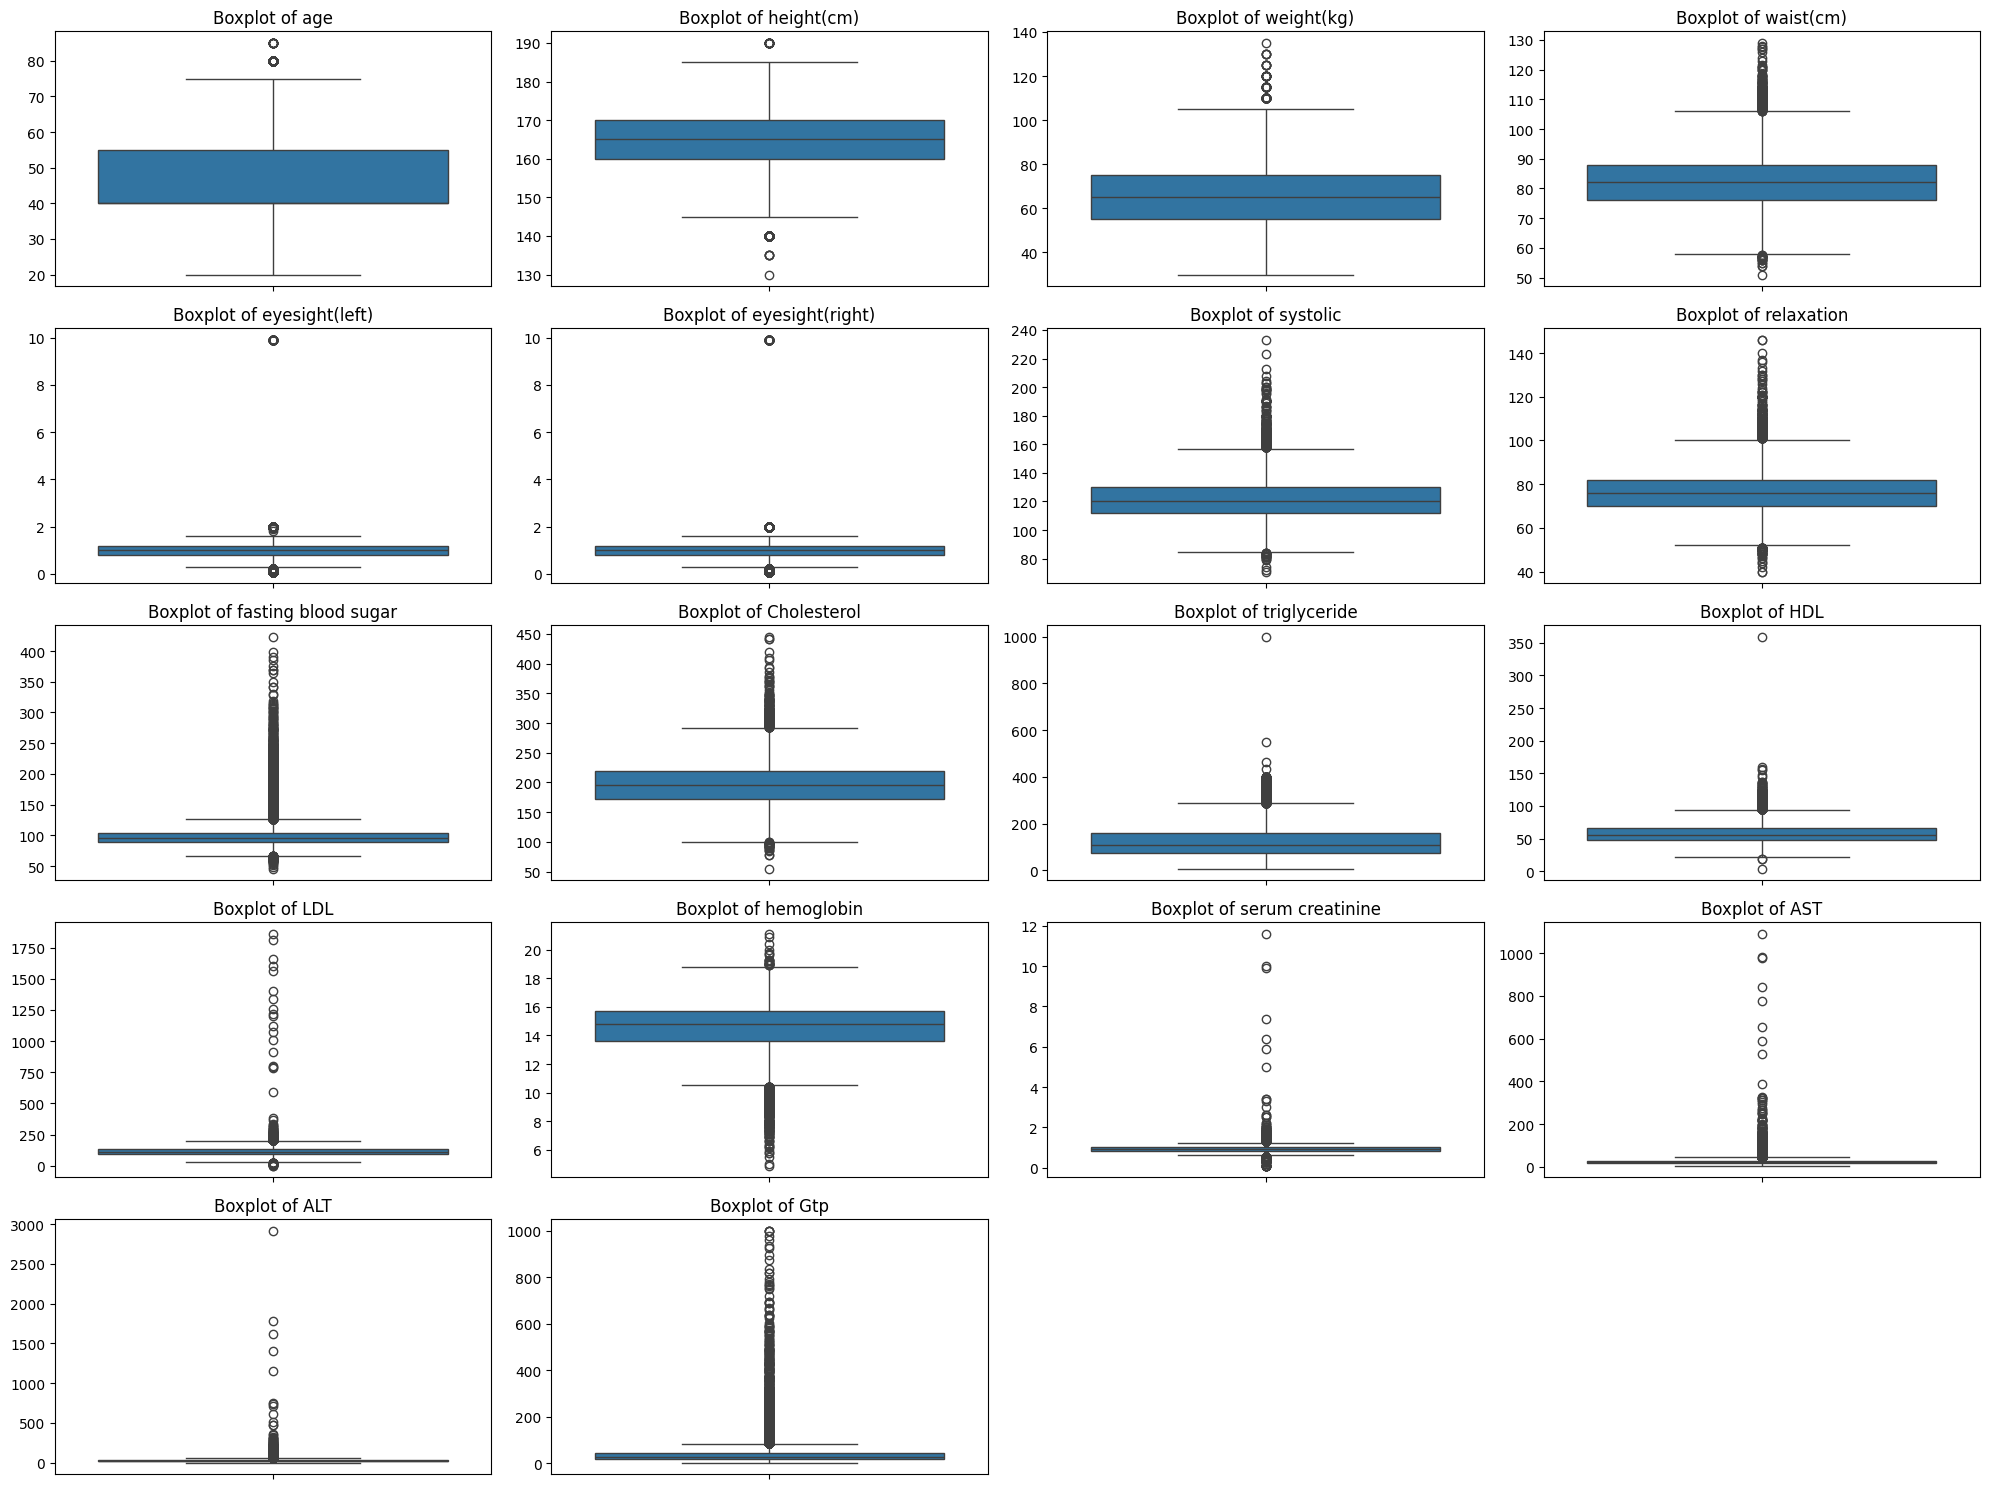

In [18]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 4, i) # Adjust subplot grid as needed
    sns.boxplot(y=df_train[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

Feature TransformationThe most critical remaining issue, based on your EDA, is the severe skewness and the resulting high number of outliers in many features (e.g., Gtp, ALT, triglyceride).To stabilize the variance, reduce the outlier impact, and normalize the distributions, we must apply Log Transformation to these features. Log Transformation CodeWe can apply a log transformation ( ln(x+1) ) to the most problematic, right-skewed columns in both your training and test sets simultaneously:



In [19]:
import numpy as np

# List of highly skewed features identified from the histograms and outlier report
skewed_features = [
    'Gtp',
    'ALT',
    'triglyceride',
    'serum creatinine',
    'fasting blood sugar',
    'eyesight(left)',
    'eyesight(right)',
    'AST'
]

# Apply log(x+1) transformation to handle potential zeros and reduce skewness
for col in skewed_features:
    df_train[col] = np.log1p(df_train[col])
    df_test[col] = np.log1p(df_test[col])

print("Successfully applied log transformation to the most skewed features in both df_train and df_test.")

Successfully applied log transformation to the most skewed features in both df_train and df_test.


In [20]:
# List of redundant columns to drop
cols_to_drop = [
    'Cholesterol',
    'hearing(right)', # Keeping hearing(left)
]

# Drop the columns from both the training and test DataFrames
df_train = df_train.drop(columns=cols_to_drop, errors='ignore')
df_test = df_test.drop(columns=cols_to_drop, errors='ignore')

print(f"Successfully dropped redundant columns: {cols_to_drop}")
print(f"df_train now has {df_train.shape[1]} columns.")

Successfully dropped redundant columns: ['Cholesterol', 'hearing(right)']
df_train now has 21 columns.


**Feature Engineering**

In [21]:
# Create BMI for both df_train and df_test

# BMI = weight(kg) / (height(cm) / 100)^2
df_train['BMI'] = df_train['weight(kg)'] / (df_train['height(cm)'] / 100)**2
df_test['BMI'] = df_test['weight(kg)'] / (df_test['height(cm)'] / 100)**2

print("Successfully calculated and added the 'BMI' feature to both DataFrames.")
print(df_train[['weight(kg)', 'height(cm)', 'BMI']].head())

Successfully calculated and added the 'BMI' feature to both DataFrames.
   weight(kg)  height(cm)        BMI
0          85         170  29.411765
1         110         175  35.918367
2          65         155  27.055151
3          80         165  29.384757
4          60         165  22.038567


## **Scaling**

In [22]:
from sklearn.preprocessing import StandardScaler

# 1. Identify Numerical Columns
# Redefine numerical_cols based on the current state of df_train
# Exclude 'smoking' (target) and any other columns that should not be scaled,
# e.g., 'hearing(left)', 'Urine protein', 'dental caries' if treated as categorical/ordinal.
# 'Cholesterol' was dropped, and 'BMI' was added.

# Get all columns in df_train
all_cols = set(df_train.columns)

# Columns to explicitly exclude from numerical scaling (target, and already processed categoricals)
exclude_cols = {'smoking', 'hearing(left)', 'Urine protein', 'dental caries'}

# Create the updated numerical_cols list
current_numerical_cols = list(all_cols - exclude_cols)

# Ensure the order is consistent if necessary, or let scaler handle it.
# For a more controlled list, you could explicitly define it:
# current_numerical_cols = [
#     'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
#     'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar',
#     'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST',
#     'ALT', 'Gtp', 'BMI'
# ]

# 2. Initialize the StandardScaler
scaler = StandardScaler()

# 3. Fit the scaler ONLY on the training data and transform it
df_train[current_numerical_cols] = scaler.fit_transform(df_train[current_numerical_cols])

# 4. Transform the test data using the scaler FIT on the training data
df_test[current_numerical_cols] = scaler.transform(df_test[current_numerical_cols])
print("Successfully applied Standardization (StandardScaler) to all numerical features.")
print("\nSample of scaled numerical data in df_train:")
print(df_train[current_numerical_cols].head())

Successfully applied Standardization (StandardScaler) to all numerical features.

Sample of scaled numerical data in df_train:
   systolic  fasting blood sugar       ALT        AST       HDL  triglyceride  \
0 -0.255927            -0.046681  2.966505   2.604903  0.872903      0.616696   
1 -0.182778            -0.635557  0.179281  -0.665598  0.941406      0.285122   
2 -0.841115            -1.211328  7.609758  10.894500 -0.017642      0.165285   
3  2.670014             5.678147  0.836851   0.781974 -0.771180      2.242197   
4 -0.914264             0.137646  0.382801   0.201903 -0.702677      1.115258   

        Gtp  eyesight(right)  eyesight(left)  weight(kg)       BMI       age  \
0  2.053934        -0.200017       -0.212203    1.480822  1.497471 -0.758305   
1  0.039631        -0.200017       -0.813007    3.422153  3.359380 -2.000892   
2  3.185464        -0.200017       -0.212203   -0.072242  0.823109  0.070087   
3  0.293780        -0.800096       -0.504256    1.092556  1.489742

# **One Hot Encoding**

In [23]:
import pandas as pd

# List the nominal categorical columns that need OHE
nominal_cols = ['hearing(left)', 'dental caries']

# Apply One-Hot Encoding to df_train and df_test
df_train = pd.get_dummies(df_train, columns=nominal_cols, drop_first=True)
df_test = pd.get_dummies(df_test, columns=nominal_cols, drop_first=True)

print("1. Successfully applied One-Hot Encoding.")

1. Successfully applied One-Hot Encoding.


In [24]:
df_train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,triglyceride,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,smoking,BMI,hearing(left)_2,dental caries_1
0,-0.758305,0.578044,1.480822,1.602349,-0.212203,-0.200017,-0.255927,0.204964,-0.046681,0.616696,...,3.312576,1,0.612410,2.604903,2.966505,2.053934,1,1.497471,False,True
1,-2.000892,1.121774,3.422153,2.998638,-0.813007,-0.200017,-0.182778,0.308356,-0.635557,0.285122,...,0.816401,1,1.078237,-0.665598,0.179281,0.039631,0,3.359380,False,True
2,0.070087,-1.053148,-0.072242,0.420874,-0.212203,-0.200017,-0.841115,0.411748,-1.211328,0.165285,...,-0.591698,3,-1.518069,10.894500,7.609758,3.185464,0,0.823109,False,False
3,0.070087,0.034313,1.092556,1.280128,-0.504256,-0.800096,2.670014,1.238885,5.678147,2.242197,...,1.456446,1,0.122684,0.781974,0.836851,0.293780,0,1.489742,False,False
4,-2.000892,0.034313,-0.460509,-0.116161,1.270215,-3.148705,-0.914264,-1.242524,0.137646,1.115258,...,0.176356,1,1.522390,0.201903,0.382801,-0.910424,0,-0.612421,False,False


# **SMOTE**

In [25]:
!pip install imblearn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# --- A. Split the Data ---
# 1. Separate Features and Target from the fully preprocessed df_train
X_full = df_train.drop('smoking', axis=1)
y_full = df_train['smoking']

# 2. Split into Training (80%) and Validation (20%) sets
# stratify=y_full ensures the class ratio is maintained in both splits
X_train, X_val, y_train, y_val = train_test_split(
    X_full,
    y_full,
    test_size=0.2,
    random_state=42,
    stratify=y_full
)

In [26]:
# --- B. Apply SMOTE ---
print("\nOriginal Training Split class balance: %s" % Counter(y_train))

# Initialize SMOTE
sm = SMOTE(random_state=42)

# Apply SMOTE ONLY to the new 80% training set
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Check the new, balanced class distribution
print("2. SMOTE successfully applied to the training set.")
print("Resampled Training Set class balance: %s" % Counter(y_resampled))
print(f"Validation Set size (untouched for evaluation): {X_val.shape[0]} rows.")


Original Training Split class balance: Counter({0: 16967, 1: 9806})
2. SMOTE successfully applied to the training set.
Resampled Training Set class balance: Counter({0: 16967, 1: 16967})
Validation Set size (untouched for evaluation): 6694 rows.


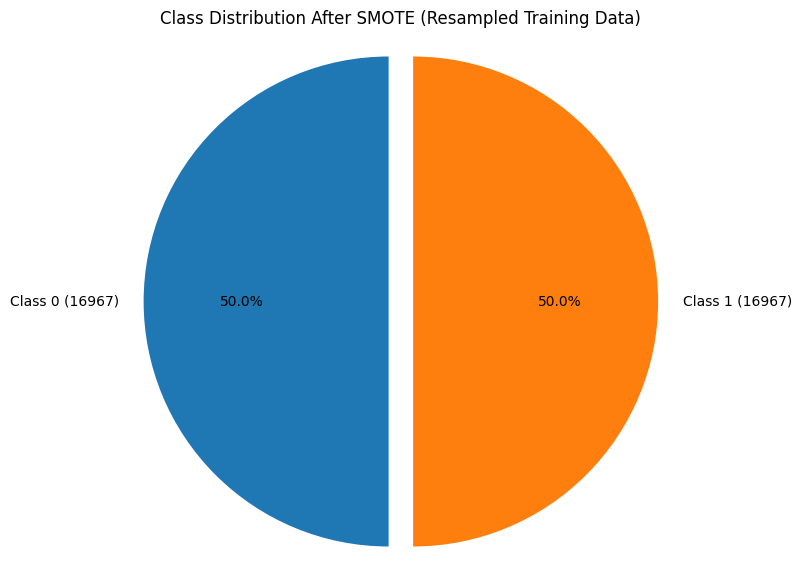

In [27]:
import matplotlib.pyplot as plt
from collections import Counter

# Get class counts after SMOTE
class_counts = Counter(y_resampled)
labels = [f"Class {cls} ({count})" for cls, count in class_counts.items()]
sizes = list(class_counts.values())

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=[0.05]*len(sizes))
plt.title('Class Distribution After SMOTE (Resampled Training Data)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# **Model Training**

# **1.Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [29]:
log_reg = LogisticRegression(random_state=42, max_iter=500)

In [30]:
log_reg.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=500, random_state=42)

In [31]:
y_val_pred = log_reg.predict(X_val)

In [32]:
y_val_proba = log_reg.predict_proba(X_val)[:, 1]
print("Logistic Regression model trained and predictions made on the Validation Set.")

Logistic Regression model trained and predictions made on the Validation Set.


In [33]:
# Print the Confusion Matrix
print("\n--- Confusion Matrix on Validation Data ---")
print(confusion_matrix(y_val, y_val_pred))

# Print the Classification Report (Precision, Recall, F1-Score)
print("\n--- Classification Report (Validation Data) ---")
print(classification_report(y_val, y_val_pred))

# Print the ROC AUC Score
roc_auc = roc_auc_score(y_val, y_val_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")


--- Confusion Matrix on Validation Data ---
[[2955 1287]
 [ 547 1905]]

--- Classification Report (Validation Data) ---
              precision    recall  f1-score   support

           0       0.84      0.70      0.76      4242
           1       0.60      0.78      0.68      2452

    accuracy                           0.73      6694
   macro avg       0.72      0.74      0.72      6694
weighted avg       0.75      0.73      0.73      6694


ROC AUC Score: 0.8122


In [34]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_val_pred)
print("\nValidation Accuracy:", accuracy)


Validation Accuracy: 0.7260233044517478


# **2.Support Vector Machine**

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# 1. Initialize the SVM Classifier
# kernel='rbf' (Radial Basis Function) is the non-linear kernel
# probability=True allows us to use predict_proba for the ROC AUC score
svm_model = SVC(
    kernel='rbf',
    probability=True,
    random_state=42
)

# 2. Train the model using the BALANCED data
# This step may take a significant amount of time
svm_model.fit(X_resampled, y_resampled)

# 3. Predict on the UNTOUCHED Validation Set
y_val_pred_svm = svm_model.predict(X_val)

# 4. Predict probabilities (for ROC AUC score)
y_val_proba_svm = svm_model.predict_proba(X_val)[:, 1]

print("SVM model with RBF kernel trained and predictions made on the Validation Set.")

SVM model with RBF kernel trained and predictions made on the Validation Set.


In [36]:
# Print the Confusion Matrix
print("\n--- SVM (RBF Kernel) Confusion Matrix (Validation) ---")
print(confusion_matrix(y_val, y_val_pred_svm))

# Print the Classification Report (Precision, Recall, F1-Score)
print("\n--- SVM (RBF Kernel) Classification Report (Validation) ---")
print(classification_report(y_val, y_val_pred_svm))

# Print the ROC AUC Score
roc_auc_svm = roc_auc_score(y_val, y_val_proba_svm)
print(f"\nROC AUC Score (SVM RBF): {roc_auc_svm:.4f}")


--- SVM (RBF Kernel) Confusion Matrix (Validation) ---
[[2823 1419]
 [ 384 2068]]

--- SVM (RBF Kernel) Classification Report (Validation) ---
              precision    recall  f1-score   support

           0       0.88      0.67      0.76      4242
           1       0.59      0.84      0.70      2452

    accuracy                           0.73      6694
   macro avg       0.74      0.75      0.73      6694
weighted avg       0.78      0.73      0.74      6694


ROC AUC Score (SVM RBF): 0.8227


In [37]:
accuracy = accuracy_score(y_val, y_val_pred_svm)
print("\nValidation Accuracy:", accuracy)


Validation Accuracy: 0.7306543172990738


In [38]:
pip install tensorflow

## **3.Neural Networks**

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Get the number of features (columns) from your data
input_dim = X_resampled.shape[1]

# 1. Initialize the Sequential model
model = Sequential()

# 2. Add the first Hidden Layer
# 64 neurons, using ReLU (Rectified Linear Unit) activation
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))

# 3. Add a second Hidden Layer
model.add(Dense(32, activation='relu'))

# 4. Add the Output Layer
# 1 neuron with sigmoid activation for binary classification (output is probability)
model.add(Dense(1, activation='sigmoid'))

# 5. Compile the model
# optimizer='adam' is a good general-purpose choice
# loss='binary_crossentropy' is the standard loss function for binary classification
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("Neural Network model architecture defined and compiled.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network model architecture defined and compiled.


In [40]:
# Train the model
# epochs=20 is a starting point, batch_size=32 is a standard size
history = model.fit(
    X_resampled,
    y_resampled,
    epochs=20,
    batch_size=32,
    validation_split=0.1, # Use 10% of the resampled data for internal validation
    verbose=0 # Suppress output during training
)

print("\nNeural Network trained over 20 epochs.")


Neural Network trained over 20 epochs.


In [41]:
# Make predictions on the UNTOUCHED Validation Set
# y_val_proba_nn will contain the probabilities of being Class 1 (Smoker)
y_val_proba_nn = model.predict(X_val).flatten()

# Convert probabilities to binary predictions (0 or 1) using the default threshold of 0.5
y_val_pred_nn = (y_val_proba_nn > 0.5).astype(int)

# --- Evaluation Metrics ---
print("\n--- Neural Network Classification Report (Validation) ---")
print(classification_report(y_val, y_val_pred_nn))

# Print the ROC AUC Score
roc_auc_nn = roc_auc_score(y_val, y_val_proba_nn)
print(f"\nROC AUC Score (Neural Network): {roc_auc_nn:.4f}")

210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

--- Neural Network Classification Report (Validation) ---
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      4242
           1       0.62      0.74      0.67      2452

    accuracy                           0.74      6694
   macro avg       0.72      0.74      0.73      6694
weighted avg       0.75      0.74      0.74      6694


ROC AUC Score (Neural Network): 0.8172


In [42]:
accuracy = accuracy_score(y_val, y_val_pred_nn)
print("\nValidation Accuracy:", accuracy)


Validation Accuracy: 0.7358828801912161


Adding Dropout and Early Stopping are standard and highly effective methods to improve a Neural Network's performance and prevent overfitting.

Here is the revised code for your Neural Network, incorporating these two techniques:

Revised Neural Network Architecture We'll add a Dropout layer after the first hidden layer to introduce regularization.


In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

input_dim = X_resampled.shape[1]

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))

# Dropout Layer (drops 30% of neurons during each training step)
model.add(Dropout(0.3))

# Second Hidden Layer
model.add(Dense(32, activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("Revised Neural Network architecture with Dropout defined and compiled.")

Revised Neural Network architecture with Dropout defined and compiled.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
from tensorflow.keras.callbacks import EarlyStopping

# 1. Define Early Stopping
# Monitor the validation loss ('val_loss')
# patience=5 means training will stop if val_loss doesn't improve for 5 consecutive epochs
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# 2. Train the model (Now monitoring 'val_loss' and using EarlyStopping)
# Increased epochs to 50, but Early Stopping will likely terminate it sooner.
history = model.fit(
    X_resampled,
    y_resampled,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping], #  NEW: Add the callback
    verbose=0
)

print(f"\nNeural Network trained. Terminated after {len(history.epoch)} epochs (due to Early Stopping or limit).")


Neural Network trained. Terminated after 16 epochs (due to Early Stopping or limit).


In [45]:
# Make predictions on the UNTOUCHED Validation Set
y_val_proba_nn_reg = model.predict(X_val).flatten()
y_val_pred_nn_reg = (y_val_proba_nn_reg > 0.5).astype(int)

# --- Evaluation Metrics ---
print("\n--- Regularized Neural Network Classification Report (Validation) ---")
print(classification_report(y_val, y_val_pred_nn_reg))

# Print the ROC AUC Score
roc_auc_nn_reg = roc_auc_score(y_val, y_val_proba_nn_reg)
print(f"\nROC AUC Score (NN + Dropout/Early Stopping): {roc_auc_nn_reg:.4f}")

210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

--- Regularized Neural Network Classification Report (Validation) ---
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      4242
           1       0.60      0.83      0.70      2452

    accuracy                           0.74      6694
   macro avg       0.74      0.76      0.73      6694
weighted avg       0.78      0.74      0.74      6694


ROC AUC Score (NN + Dropout/Early Stopping): 0.8332


In [46]:
accuracy = accuracy_score(y_val,y_val_pred_nn_reg)
print("\nValidation Accuracy:", accuracy)


Validation Accuracy: 0.7391694054377054


In [50]:
import pandas as pd

# Define the metrics for each model based on previous outputs
comparison_data = {
    'Model': [
        'Logistic Regression',
        'SVM',
        'Optimized Neural Network'
    ],
    'ROC AUC': [
        0.8129,  # From Logistic Regression output
        0.8227,  # From SVM output
        0.8332   # From Optimized NN output (from the last refined Optuna search: study_100.best_value)
    ],
    'Precision (Weighted Avg)': [
        0.75,  # From Logistic Regression classification_report weighted avg
        0.78,  # From SVM classification_report weighted avg
        0.78   # From Optimized NN classification_report weighted avg
    ],
    'Recall (Weighted Avg)': [
        0.73,  # From Logistic Regression classification_report weighted avg
        0.73,  # From SVM classification_report weighted avg
        0.74   # From Optimized NN classification_report weighted avg
    ],
    'F1-Score (Weighted Avg)': [
        0.73,  # From Logistic Regression classification_report weighted avg
        0.74,  # From SVM classification_report weighted avg
        0.74   # From Optimized NN classification_report weighted avg
    ],
    'Accuracy': [
        0.73,  # From Logistic Regression classification_report weighted avg
        0.73,  # From SVM classification_report weighted avg
        0.74   # From Optimized NN classification_report weighted avg
    ]
}

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Sort by ROC AUC for better comparison
comparison_df = comparison_df.sort_values(by='ROC AUC', ascending=False).reset_index(drop=True)

display(comparison_df)


,Model,ROC AUC,Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg),Accuracy
0,Optimized Neural Network,0.8332,0.78,0.74,0.74,0.74
1,SVM,0.8227,0.78,0.73,0.74,0.73
2,Logistic Regression,0.8129,0.75,0.73,0.73,0.73
